In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.feature import hog
from skimage.transform import resize
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.special import rel_entr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Image folder path
image_folder = '/content/drive/My Drive/Image Analysis/imageset1/'

# Image file names
image_files = ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg']

In [ ]:
# HOG Feature extraction parameters
orientations = 9  # Number of orientation bins
pixels_per_cell = (8, 8)  # Size of a cell (in pixels)
cells_per_block = (2, 2)  # Number of cells in each block
resize_shape = (128, 128)  # Resize all images to 128x128 pixels

In [ ]:
# List to store HOG feature vectors
hog_features = []

# Loop through each image file
for file in image_files:
    file_path = os.path.join(image_folder, file)

    # Load the image in grayscale
    img = imread(file_path, as_gray=True)

    # Resize the image to a fixed size
    img_resized = resize(img, resize_shape)

    # Extract HOG features
    hog_feature, hog_image = hog(img_resized, orientations=orientations, pixels_per_cell=pixels_per_cell,
                                 cells_per_block=cells_per_block, visualize=True, block_norm='L2-Hys')

    # Append the HOG feature vector to the list
    hog_features.append(hog_feature)

# Convert HOG features list to a numpy array
hog_features = np.array(hog_features)

In [ ]:
# Jensen-Shannon Divergence function using KL divergence
def jensen_shannon_distance(p, q):
    """Calculate the Jensen-Shannon divergence between two vectors."""
    p = np.array(p) / np.sum(p)  # Normalize
    q = np.array(q) / np.sum(q)  # Normalize
    m = 0.5 * (p + q)
    return 0.5 * (np.sum(rel_entr(p, m)) + np.sum(rel_entr(q, m)))

In [ ]:
# Compute the distance matrix (8x8 since we have 8 images)
num_images = len(hog_features)
distance_matrix = np.zeros((num_images, num_images))

In [ ]:
# Fill the distance matrix using Jensen-Shannon divergence
for i in range(num_images):
    for j in range(i+1, num_images):
        dist = jensen_shannon_distance(hog_features[i], hog_features[j])
        distance_matrix[i, j] = dist
        distance_matrix[j, i] = dist  # Symmetric matrix


In [ ]:
# Convert distance matrix to condensed form (needed for clustering)
condensed_distance_matrix = squareform(distance_matrix)

In [ ]:
# Function to plot dendrogram for different linkage methods
def plot_dendrogram(linkage_method):
    plt.figure(figsize=(10, 7))
    linkage_matrix = linkage(condensed_distance_matrix, method=linkage_method)
    dendrogram(linkage_matrix, labels=image_files)
    plt.title(f'Hierarchical Clustering Dendrogram ({linkage_method.capitalize()})')
    plt.xlabel('Image Index')
    plt.ylabel('Distance')
    plt.show()

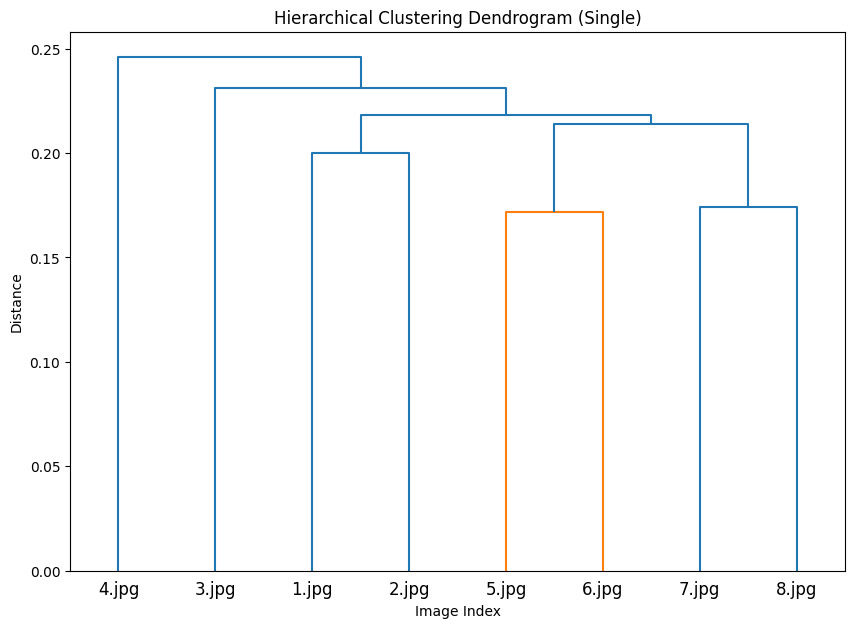

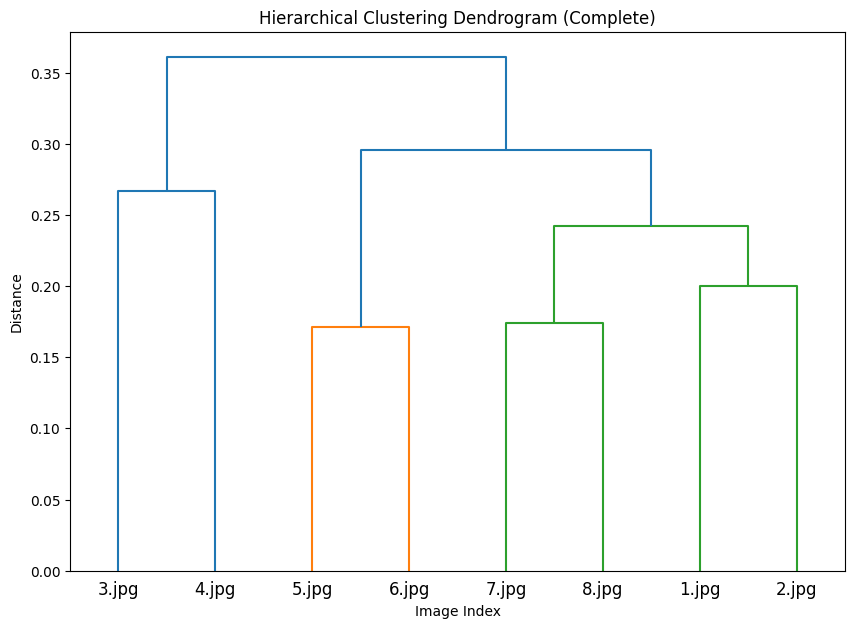

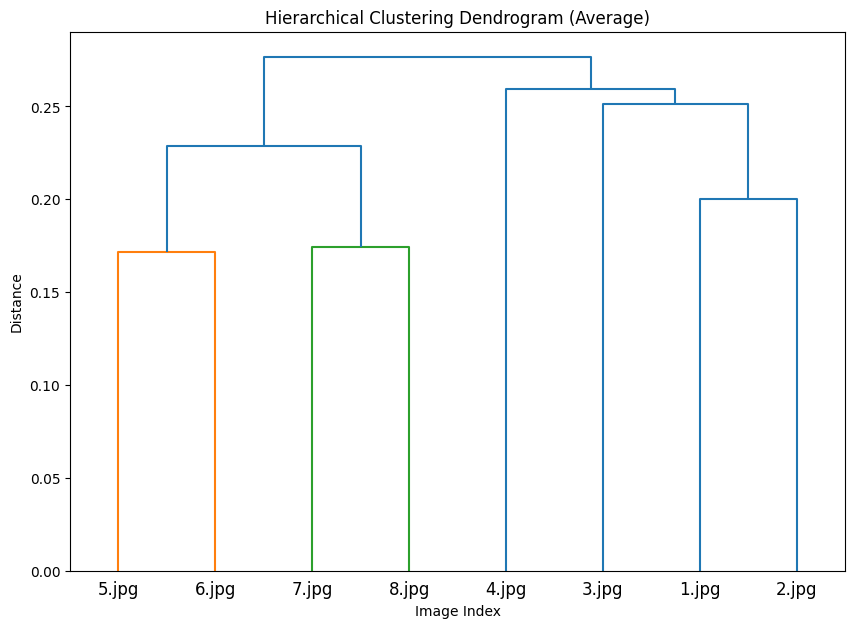

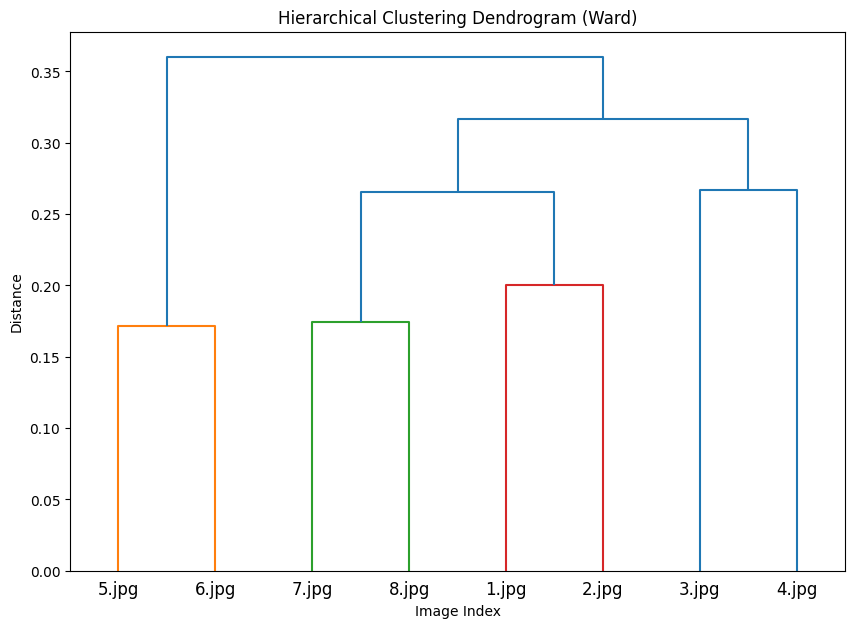

In [ ]:
# Perform and plot dendrograms for different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']
for method in linkage_methods:
    plot_dendrogram(method)

Improving

<ipython-input-57-48f595c81bad>:25: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method=method)


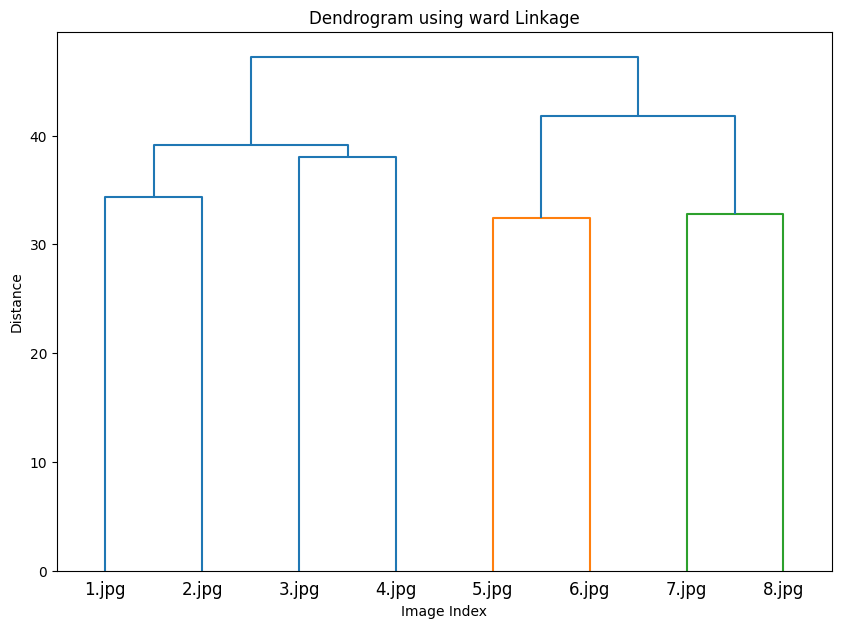

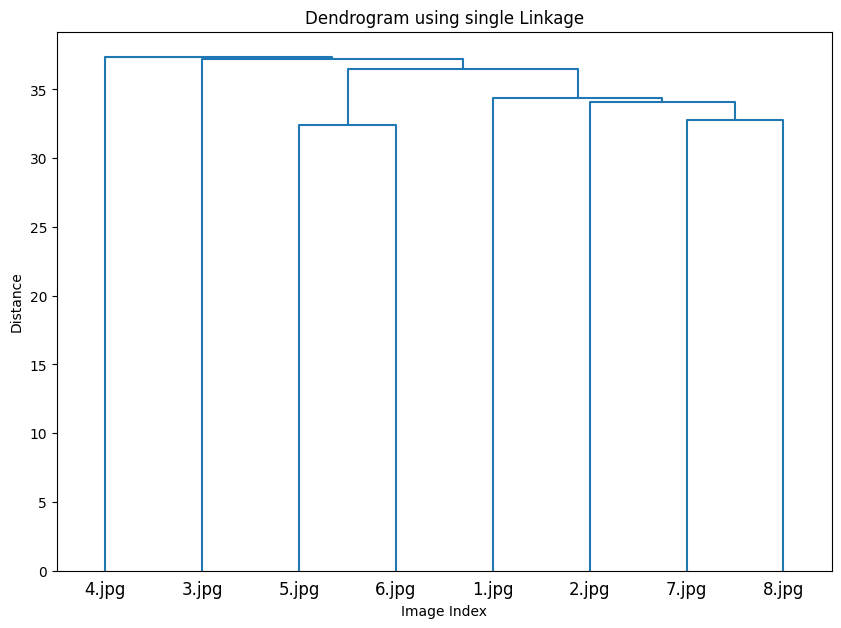

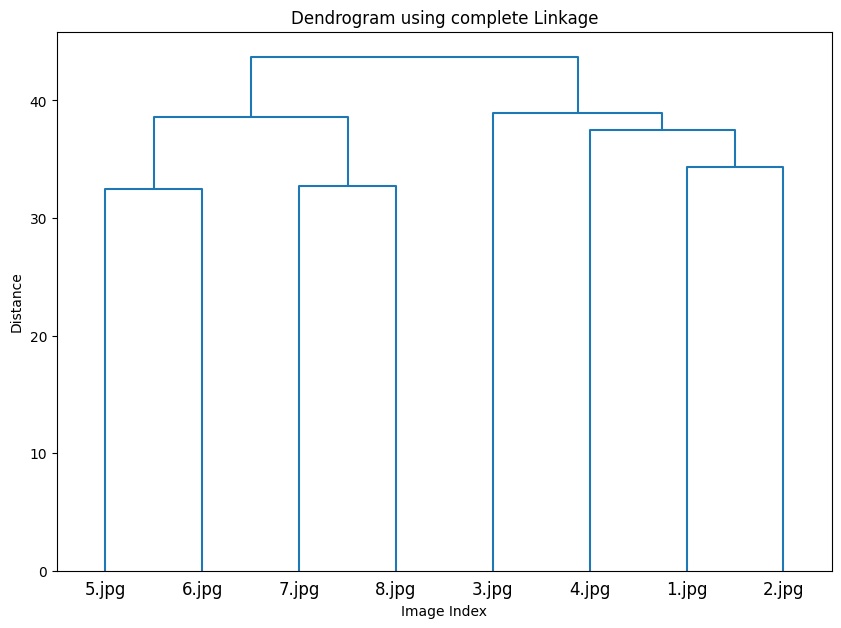

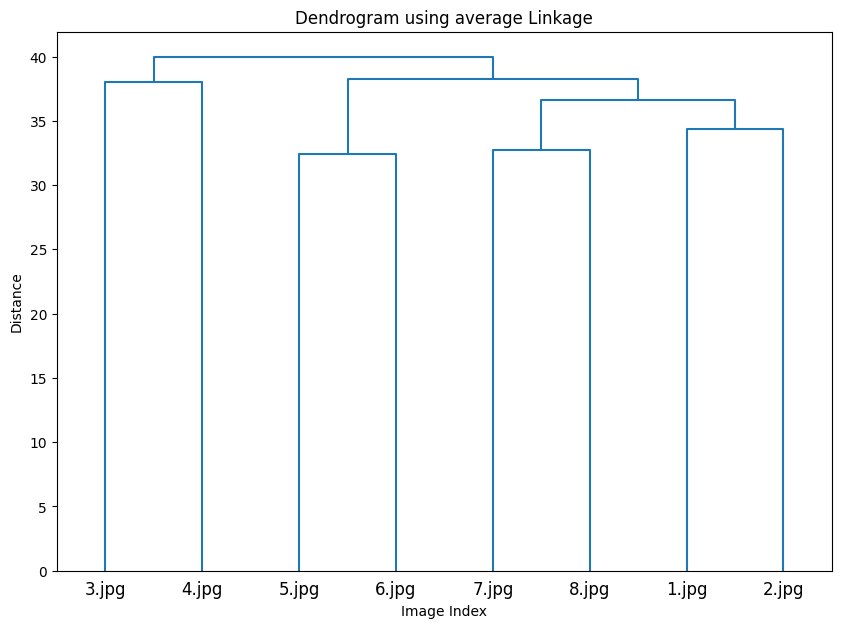

In [ ]:
from scipy.spatial.distance import pdist

# Initialize list to hold HOG features
hog_features = []

# Feature extraction
for file in image_files:
    img = imread(os.path.join(image_folder, file), as_gray=True)
    img = resize(img, (224, 224))  # Resize image
    features, _ = hog(img, orientations=orientations, pixels_per_cell=pixels_per_cell,
                      cells_per_block=cells_per_block, visualize=True, feature_vector=True)
    hog_features.append(features)

# Convert HOG features list to a numpy array
hog_features = np.array(hog_features)

# Compute the distance matrix using Euclidean distance
distance_matrix = pdist(hog_features, metric='euclidean')
distance_matrix = squareform(distance_matrix)

# Apply hierarchical clustering using different linkage methods
linkage_methods = ['ward', 'single', 'complete', 'average']
for method in linkage_methods:
    plt.figure(figsize=(10, 7))
    Z = linkage(distance_matrix, method=method)
    dendrogram(Z, labels=image_files)
    plt.title(f'Dendrogram using {method} Linkage')
    plt.xlabel('Image Index')
    plt.ylabel('Distance')
    plt.show()